In [1]:
import os
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Data

In [17]:
DATA_PATH = "/Users/lukefoster/Documents/CompEtho/Cluster_Comparison_Pipeline_Antennae"

all_DF = pd.read_csv(f"{DATA_PATH}/all_clusters.csv", index_col=0)

In [18]:
all_DF

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster38,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47
0,10BYmidfd_antmovie200928223820,0.0,0.0,0.0,0.161857,0.190715,0.196989,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
1,fr_no_antennae_antmovie200927211714,0.0,0.0,0.0,0.007194,0.244604,0.273381,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
2,00AAmidfr_antmovie200926195039,0.0,0.0,0.0,0.186091,0.222062,0.225899,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
3,04WTmidfr_antmovie201010202950,0.0,0.0,0.0,0.250520,0.163410,0.129730,0.0,0.0,0.025780,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
4,06WRmajfd_antmovie200929211318,0.0,0.0,0.0,0.166429,0.187807,0.115281,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,05WOmajfd_antmovie201010205850,0.0,0.0,0.0,0.127257,0.171477,0.270297,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
139,08dOminfd_antmovie200927211313,0.0,0.0,0.0,0.159574,0.021277,0.553191,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
140,10RYfr_left_antn_no_move_antmovie200927214552,0.0,0.0,0.0,0.104408,0.186195,0.319606,0.0,0.0,0.000000,...,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000
141,mean,0.0,0.0,0.0,0.177375,0.186876,0.169418,0.0,0.0,0.001878,...,0.0,0.0,0.000038,0.0,0.001176,0.000328,0.0,0.0,0.000074,0.001353


## Introducing ZIP (Zero-Inflated Poisson)

In [19]:
from patsy import dmatrices
import statsmodels.api as sm

### Formatting Data into Usable Dataframe

In [20]:
castes = ['maj', 'mid', 'min']

In [21]:
# remove video files that don't fit within specified caste keywords
try:
    for i in range(len(all_DF)):
        if any(caste in all_DF["Video File"][i] for caste in castes):
            pass
        else:
            all_DF = all_DF.drop(i)
except:
    print("already dropped un-wanted videos")


df = all_DF.reset_index(drop=True)

df["caste"] = ""

for i in range(len(df)):
    for caste in castes:
        if caste in df["Video File"][i]:
            df["caste"][i] += caste
            
for i in range(len(df)):
    if df.isnull()["cluster0"][i]:
        df = df.drop(i)
        
df = df.reset_index(drop=True)

<ipython-input-21-712b8847694e>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["caste"][i] += caste


In [22]:
df

,Video File,cluster0,cluster1,cluster2,cluster3,cluster4,cluster5,cluster6,cluster7,cluster8,...,cluster39,cluster40,cluster41,cluster42,cluster43,cluster44,cluster45,cluster46,cluster47,caste
0,10BYmidfd_antmovie200928223820,0.0,0.0,0.0,0.161857,0.190715,0.196989,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
1,00AAmidfr_antmovie200926195039,0.0,0.0,0.0,0.186091,0.222062,0.225899,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
2,04WTmidfr_antmovie201010202950,0.0,0.0,0.0,0.250520,0.163410,0.129730,0.0,0.0,0.02578,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
3,06WRmajfd_antmovie200929211318,0.0,0.0,0.0,0.166429,0.187807,0.115281,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj
4,04Ydmidfd_antmovie200924204640,0.0,0.0,0.0,0.191365,0.117853,0.031505,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.156359,0.0,0.0,0.0,0.0,0.0,mid
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,15RTmidfr_antmovie200927233405,0.0,0.0,0.0,0.223547,0.198983,0.137645,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,mid
124,03YBmajfr_antmovie200928195842,0.0,0.0,0.0,0.124230,0.183157,0.276605,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj
125,03BPmajfr_antmovie200929200853,0.0,0.0,0.0,0.163443,0.177902,0.191774,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj
126,05WOmajfd_antmovie201010205850,0.0,0.0,0.0,0.127257,0.171477,0.270297,0.0,0.0,0.00000,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,maj


### Keeping Track of Cluster Distribution Between Castes

In [23]:
count_dict = {}

for cluster in range(df.shape[1]-2):
    count_dict[f'cluster{cluster}'] = {caste : [] for caste in castes}
    
    for index,proportion in enumerate(df[f'cluster{cluster}']):
        for caste in castes:
            if proportion > 0 and df['caste'][index] == caste:
                count_dict[f'cluster{cluster}'][caste].append(df['Video File'][index])

count_dict

{'cluster0': {'maj': [], 'mid': [], 'min': []},
 'cluster1': {'maj': [], 'mid': [], 'min': []},
 'cluster2': {'maj': [], 'mid': [], 'min': []},
 'cluster3': {'maj': ['06WRmajfd_antmovie200929211318',
   '13RGmajfd_antmovie200927225925',
   '03BPmajfd_antmovie200929202854',
   '05BOmajfd_antmovie200929205417',
   '03WPmajfd_antmovie201010201128',
   '03dRmajfr_antmovie200924195844',
   '06WRmajfr_antmovie200929210434',
   '03YBmajfd_antmovie200928200603',
   '06dYmajfd_antmovie200924214927',
   '03WPmajfr_antmovie201010200214',
   '05WOmajfr_antmovie201010204948',
   '09BRmajfr_antmovie200928215349',
   '09BRmajfd_antmovie200928221355',
   '02RRmajfr_antmovie200924193332',
   '03PPmajfd_antmovie200927201541',
   '13RGmajfr_antmovie200927225156',
   '08GBmajfd_antmovie201010220356',
   '02dPmajfr_antmovie200927195452',
   '02BGmajfr_antmovie200929195124',
   '07GYmajfr_antmovie201010213128',
   '06dYmajfr_antmovie200924213953',
   '02BGmajfd_antmovie200929195924',
   '04BTmajfd_antmovie2

In [24]:
all_caste_clusters = []

for cluster,counts in count_dict.items():
    if all(len(counts[caste]) > 0 for caste in castes):
        all_caste_clusters.append(cluster)
        
all_caste_clusters

['cluster3',
 'cluster4',
 'cluster5',
 'cluster30',
 'cluster31',
 'cluster32',
 'cluster33']

In [25]:
single_caste_clusters = []

for cluster,counts in count_dict.items():
    count = 0
    for caste in castes:
        if len(counts[caste]) > 0:
            count += 1
    if count == 1:
        single_caste_clusters.append(cluster)

single_caste_clusters

['cluster15',
 'cluster20',
 'cluster21',
 'cluster22',
 'cluster25',
 'cluster34',
 'cluster36',
 'cluster37',
 'cluster40',
 'cluster42',
 'cluster43',
 'cluster46',
 'cluster47']

### Running ZIP for each Cluster:

In [26]:
mask = np.random.rand(len(df)) < 0.8
df_train = df[mask]
df_test = df[~mask]
print('Training data set length='+str(len(df_train)))
print('Testing data set length='+str(len(df_test)))

Training data set length=109
Testing data set length=19


In [27]:
for i in range(47):
    formula = f"cluster{i} ~ caste"
    y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')
    
    zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, 
                                                  inflation='logit').fit()
    print(zip_training_results.summary())
    

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster0   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:33   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster1   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:37   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/py

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster2   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:41   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster6   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:45   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/pytho

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster7   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:48   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster9   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:52   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster10   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:55   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster11   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:41:59   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster12   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:03   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster13   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:06   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/pytho

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster14   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:10   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster16   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:14   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster17   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:17   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster18   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:21   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster19   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:24   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster20   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:28   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster21   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:31   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster22   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:35   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster23   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:38   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster24   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:42   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster25   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:46   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster26   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:50   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster27   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:53   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster28   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:42:57   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/py

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster29   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:00   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in sub

Optimization terminated successfully.
         Current function value: 0.284229
         Iterations: 25
         Function evaluations: 26
         Gradient evaluations: 26
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster33   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                 0.03761
Time:                         21:43:01   Log-Likelihood:                -30.981
converged:                        True   LL-Null:                       -32.191
Covariance Type:             nonrobust   LLR p-value:                    0.2980
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_In

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster34   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:04   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster35   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:07   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster36   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:11   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster37   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:14   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster38   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:17   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/pytho

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster39   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:21   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/pytho

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster41   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:24   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster44   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                     nan
Time:                         21:43:28   Log-Likelihood:                    nan
converged:                       False   LL-Null:                           nan
Covariance Type:             nonrobust   LLR p-value:                       nan
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept        0.1000        nan        nan        nan         nan         nan
inflate_caste[T.mid]     0.1000        nan        nan        nan         nan         nan
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '


### Dealing with NaN Results
ZIP returns NaN results for a specific cluster when it only has zero values for a single caste, in either the training or testing set (df[mask] and df[~mask]). Maybe something to do with a divide by zero error, I'm not sure.
To keep track of these clusters, every time a cluster has successful, non-nan results, I add the cluster number to a list of "good clusters" and only print out the good results.

In [30]:
good_clusters = []

for i in range(47):
    formula = f"cluster{i} ~ caste"
    y_train, X_train = dmatrices(formula, df_train, return_type='dataframe')
    y_test, X_test = dmatrices(formula, df_test, return_type='dataframe')
    
    zip_training_results = sm.ZeroInflatedPoisson(endog=y_train, exog=X_train, exog_infl=X_train, 
                                                  inflation='logit').fit()
    if zip_training_results.pvalues[0] >= 0 or zip_training_results.pvalues[0] < 0:
        good_clusters.append(i)
        print(zip_training_results.summary())
print(f"GOOD CLUSTERS: {good_clusters}")

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: 0.420192
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster3   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                0.005799
Time:                         21:44:35   Log-Likelihood:                -45.801
converge

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid

         Current function value: 0.393891
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:                cluster5   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                 0.01589
Time:                         21:44:35   Log-Likelihood:                -42.934
converged:                       False   LL-Null:                       -43.627
Covariance Type:             nonrobust   LLR p-value:                    0.4999
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -14.1083    172.576     -

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1081: RuntimeWarning: invalid value encountered in multiply
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmode

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.005850
         Iterations: 32
         Function evaluations: 35
         Gradient evaluations: 35
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Fun

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluat

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1081: RuntimeWarning: invalid value encountered in multiply
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmode

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: 0.017902
         Iterations: 35
         Function evaluations: 36
         Gradient evaluations: 36
                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster30   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                 0.01503
Time:                         21:44:36   Log-Likelihood:                -1.9513
converged:                       False   LL-Null:                       -1.9811
Covariance Type:             nonrobust   LLR p-value:                    0.9707
                           coef    std err          z      P>|z|      [0.025      0.975]
-----------

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid

                     ZeroInflatedPoisson Regression Results                    
Dep. Variable:               cluster32   No. Observations:                  109
Model:             ZeroInflatedPoisson   Df Residuals:                      106
Method:                            MLE   Df Model:                            2
Date:                 Tue, 12 Oct 2021   Pseudo R-squ.:                0.006474
Time:                         21:44:36   Log-Likelihood:                -5.3610
converged:                        True   LL-Null:                       -5.3960
Covariance Type:             nonrobust   LLR p-value:                    0.9657
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
inflate_Intercept      -45.8025   1.41e+07  -3.26e-06      1.000   -2.76e+07    2.76e+07
inflate_caste[T.mid]   -16.6746   1.96e+07  -8.49e-07      1.000   -3.85e+07    3.85e+07
infl

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1081: RuntimeWarning: invalid value encountered in multiply
  return -np.exp(XB) +  endog*XB - gammaln(endog+1)
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/base/model.py:547: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  warnings.warn('Inverting hessian failed, no bse or cov_params '
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmode

         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: 0.000473
         Iterations: 35
         Function evaluations: 39
         Gradient evaluations: 39
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization terminated successfully.
         Current function value: 0.008658
         Iterations: 30
         Function evaluations: 34
         Gradient evaluations: 34
Optimization terminated successfully.
         Current function value: 0.002912
         Iterations: 27
         Function evaluations: 31
         Gradient evaluations: 31
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
         Current function value: nan
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1
Optimization termi

/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1088: RuntimeWarning: divide by zero encountered in log
  params = [np.log(const)]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1053: RuntimeWarning: invalid value encountered in multiply
  return np.sum(-np.exp(XB) +  endog*XB - gammaln(endog+1))
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:596: RuntimeWarning: invalid value encountered in subtract
  if (numpy.max(numpy.ravel(numpy.abs(sim[1:] - sim[0]))) <= xatol and
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:601: RuntimeWarning: invalid value encountered in subtract
  xr = (1 + rho) * xbar - rho * sim[-1]
/Users/lukefoster/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/optimize.py:643: RuntimeWarning: invalid value encountered in subtract
  sim[j] = sim[0] + sigma * (sim[j] - sim[0])
/Use

## Introducing UMAP

In [42]:
import umap
from sklearn.preprocessing import StandardScaler

import matplotlib.patches as mpatches

In [47]:
reducer = umap.UMAP()

In [51]:
cluster_strings = []
for i in range(47):
    cluster_strings.append(f'cluster{i}')

cluster_data = df[cluster_strings].values

scaled_cluster_data = StandardScaler().fit_transform(cluster_data)

In [60]:
embedding = reducer.fit_transform(scaled_cluster_data)
embedding.shape

(128, 2)

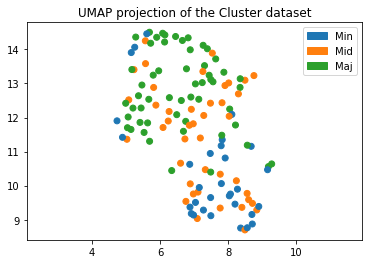

In [61]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df.caste.map({"min":0, "mid":1, "maj":2})])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Cluster dataset')


min_patch = mpatches.Patch(color=sns.color_palette()[0], label='Min')
mid_patch = mpatches.Patch(color=sns.color_palette()[1], label='Mid')
maj_patch = mpatches.Patch(color=sns.color_palette()[2], label='Maj')

plt.legend(handles=[min_patch, mid_patch, maj_patch])

#plt.savefig("cluster_umap.png")
plt.show()

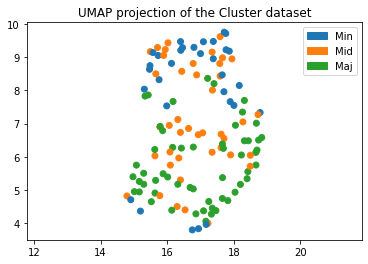

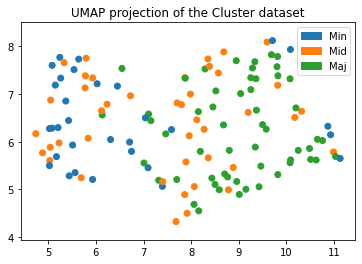

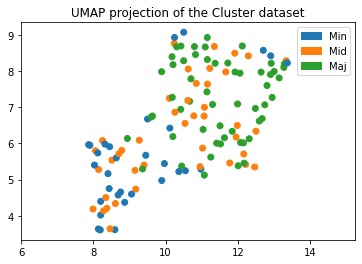

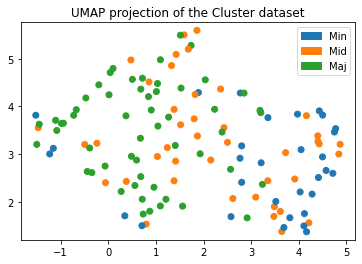

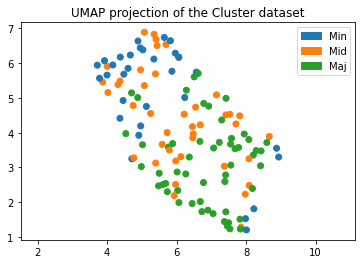

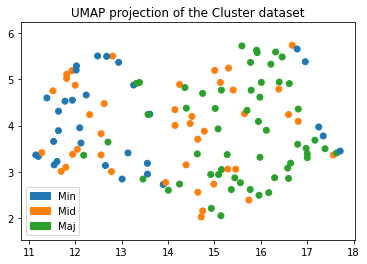

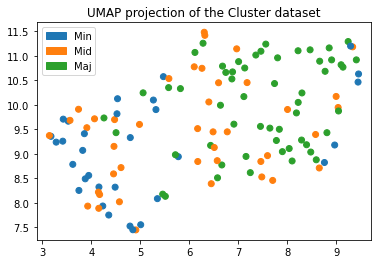

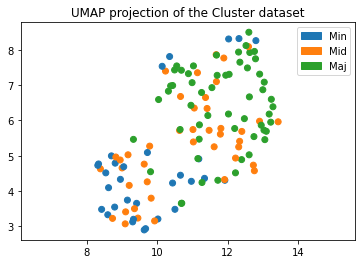

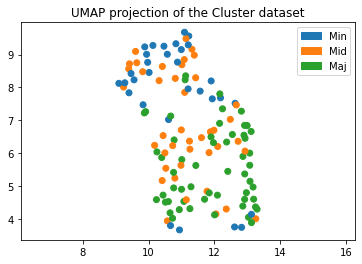

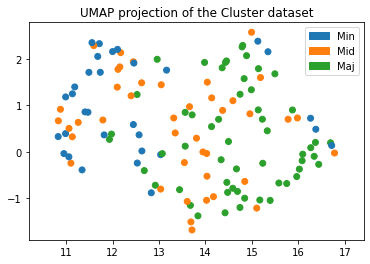

In [62]:
for i in range(10):
    embedding = reducer.fit_transform(scaled_cluster_data)
    embedding.shape
    
    plt.scatter(
        embedding[:, 0],
        embedding[:, 1],
        c=[sns.color_palette()[x] for x in df.caste.map({"min":0, "mid":1, "maj":2})])
    plt.gca().set_aspect('equal', 'datalim')
    plt.title('UMAP projection of the Cluster dataset')


    min_patch = mpatches.Patch(color=sns.color_palette()[0], label='Min')
    mid_patch = mpatches.Patch(color=sns.color_palette()[1], label='Mid')
    maj_patch = mpatches.Patch(color=sns.color_palette()[2], label='Maj')

    plt.legend(handles=[min_patch, mid_patch, maj_patch])

    #plt.savefig("cluster_umap.png")
    plt.show()